In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [2]:
df = pd.read_csv("C:/root/STUDY/For_Python CSV Files/credit_card_default.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [5]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
#renaming for better convinience

df['IsDefaulter'] =df ['default payment next month']
df.drop('default payment next month',axis = 1, inplace= True)
# df.rename({'default.payment.next.month' : 'IsDefaulter'}, inplace=True)

<Axes: xlabel='IsDefaulter', ylabel='count'>

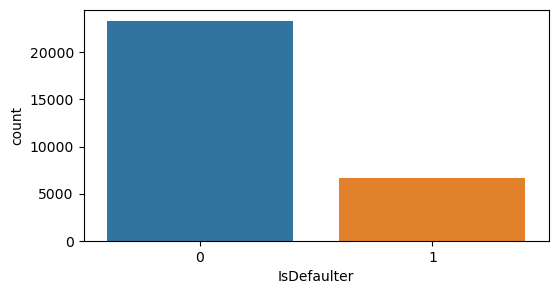

In [7]:
#Plotting the total no of Defaulters

plt.figure(figsize=(6,3))
sns.countplot(x = 'IsDefaulter', data = df)

In [8]:
#Getting the counts for each set of data

df['IsDefaulter'].value_counts()

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

In [9]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [10]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [11]:
#dataset we have values like 5,6,0 as well for which we are not having description 
#so we can add up them in 4, which is Others.

fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

In [12]:
df['MARRIAGE'].value_counts()


MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

Plotting Categorical Features for analysis

In [14]:
#Train Test Split data into X and Y

X = df.drop(columns=['IsDefaulter'],axis=1)
y = df.IsDefaulter

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [16]:
#Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
#Import libraries KNN,SVC,GradientBoosting,AdaBoost and XGB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

In [19]:
knn = KNeighborsClassifier()
svm = SVC()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
xgb = xgb.XGBClassifier()


In [20]:
#Training
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [25]:
y_pred1 = knn.predict(X_test_scaled)

In [21]:
svm.fit(X_train_scaled, y_train)

SVC()

In [26]:
y_pred2 = svm.predict(X_test_scaled)    

In [22]:
gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [27]:
y_pred3 = gb.predict(X_test_scaled)

In [23]:
ada.fit(X_train_scaled, y_train)

AdaBoostClassifier()

In [28]:
y_pred4 = ada.predict(X_test_scaled)

In [24]:
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred5 = xgb.predict(X_test_scaled)

In [32]:
knn_accuracy = accuracy_score(y_test, y_pred1)
svm_accuracy = accuracy_score(y_test, y_pred2)
gb_accuracy = accuracy_score(y_test, y_pred3)
ada_accuracy = accuracy_score(y_test, y_pred4)
xgb_accuracy = accuracy_score(y_test, y_pred5)

print("KNN Accuracy:", knn_accuracy,
      "SVM Accuracy:", svm_accuracy,
      "GBA:", gb_accuracy,
      "AdaBoost Accuracy:", ada_accuracy,
      "XGB Accuracy:", xgb_accuracy)     

KNN Accuracy: 0.7937333333333333 SVM Accuracy: 0.8169333333333333 GBA: 0.8218666666666666 AdaBoost Accuracy: 0.8178666666666666 XGB Accuracy: 0.8136


In [33]:
#Hyper Parameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [36]:
kf = KFold(n_splits = 10)
for train_index, test_index in kf.split(X,y):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [ 3000  3001  3002 ... 29997 29998 29999]
Test Index [   0    1    2 ... 2997 2998 2999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [3000 3001 3002 ... 5997 5998 5999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [6000 6001 6002 ... 8997 8998 8999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [ 9000  9001  9002 ... 11997 11998 11999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [12000 12001 12002 ... 14997 14998 14999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [15000 15001 15002 ... 17997 17998 17999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [18000 18001 18002 ... 20997 20998 20999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [21000 21001 21002 ... 23997 23998 23999]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [24000 24001 24002 ... 26997 26998 26999]
Training Index [    0     1 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
     

In [38]:
model = LogisticRegression(max_iter=100)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
score = cross_val_score(model,X,y,cv = kf)
print("Cross Validation Scores are{}".format(score))

Cross Validation Scores are[0.777      0.78533333 0.76433333 0.77566667 0.77166667 0.74233333
 0.78466667 0.80866667 0.799      0.779     ]


In [41]:
print('Averge Cross Validaton Score: {}'.format(score.mean()))

Averge Cross Validaton Score: 0.7787666666666666


In [42]:
#Stratified K Fold
from sklearn.model_selection import StratifiedKFold

In [43]:
skfold_validator = StratifiedKFold (n_splits = 10)


In [44]:
for train_index, test_index in skfold_validator.split(X,y):
  print('Training Index', train_index)
  print('Test Index', test_index)

Training Index [ 2993  2995  2996 ... 29997 29998 29999]
Test Index [   0    1    2 ... 3001 3004 3005]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [2993 2995 2996 ... 6044 6045 6047]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [5983 5984 5985 ... 9030 9032 9033]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [ 8883  8886  8888 ... 12047 12048 12049]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [11794 11796 11802 ... 15067 15068 15069]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [14766 14770 14778 ... 18217 18218 18220]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [17316 17319 17323 ... 21194 21196 21197]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [20429 20437 20439 ... 24071 24072 24073]
Training Index [    0     1     2 ... 29997 29998 29999]
Test Index [23691 23696 23704 ... 26997 26998 26999]
Training Index [    0     1 

In [46]:
skcv_results = cross_val_score(model,X, y, cv = skfold_validator)
skcv_results

array([0.77833333, 0.779     , 0.77866667, 0.77866667, 0.77866667,
       0.77866667, 0.779     , 0.779     , 0.779     , 0.779     ])

In [47]:
print('Averge Stratified Cross Validaton Score : {}'.format(skcv_results.mean()))


Averge Stratified Cross Validaton Score : 0.7787999999999999


In [49]:
#Tuning using decision tree
from sklearn import tree
     
#cross-validation with different values
max_depth = [1,2,3,4,5,6,7,8,9,10]

In [50]:
for val in max_depth:
  score = cross_val_score(tree.DecisionTreeClassifier(max_depth = val), X, y, cv = kf, scoring = 'accuracy')
  print(f'Average score{val}): {"{:.3f}".format(score.mean())}')

Average score1): 0.820
Average score2): 0.819
Average score3): 0.820
Average score4): 0.821
Average score5): 0.820
Average score6): 0.815
Average score7): 0.814
Average score8): 0.812
Average score9): 0.809
Average score10): 0.806


In [51]:
# Define a hyperparameter grid
parameters ={'n_estimators': [100, 200],
    'max_depth': [10, 2],
    'criterion': ['gini','entropy']}

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
grid_search = GridSearchCV(
    RandomForestClassifier(),
    parameters,
    cv = 5,# 5-fold cross-validation
    scoring = 'accuracy',# Evaluation metric
    n_jobs = -1
)
grid_result = grid_search.fit(X_train,y_train)


In [53]:
#Best parameters and score
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_*100)


Best Params:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
Best Score:  81.94666666666667
